## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '../data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
unique_house_type = app_train['HOUSETYPE_MODE'].unique()
for i in range(len(unique_house_type)):
    print(unique_house_type[i])
    print(app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & \
                              (app_train['TARGET'] == 0), 'AMT_CREDIT'])

block of flats
1         1293502.5
12          80865.0
13         918468.0
14         773680.5
18         157500.0
20         427500.0
22         497520.0
23         239850.0
24         247500.0
25         225000.0
29         180000.0
30         665892.0
31         512064.0
32         199008.0
34        1125000.0
35         450000.0
38         247275.0
39         540000.0
43         746280.0
50         135000.0
51         675000.0
52         454500.0
54         675000.0
55         837427.5
57         247500.0
59        1227901.5
60        1663987.5
61        1080000.0
62        1130760.0
64         315000.0
            ...    
307455     225000.0
307456     270000.0
307458     239850.0
307459     959017.5
307461     463500.0
307462    1024785.0
307463     247275.0
307464     528633.0
307465     835380.0
307466     599778.0
307467     675000.0
307468     305955.0
307469     703728.0
307474     360000.0
307476    1762110.0
307477     796396.5
307478    1125000.0
307480    1350000.0
30748

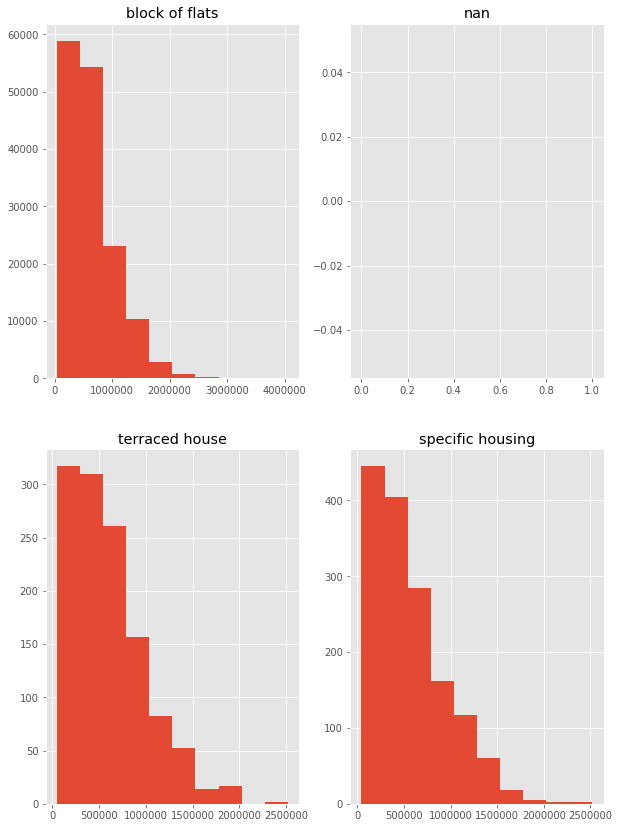

In [15]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
unique_house_type = app_train['HOUSETYPE_MODE'].unique()

nrows = len(unique_house_type)
ncols = nrows // 2



plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) , 'AMT_CREDIT'].hist()
    
    plt.title(str(unique_house_type[i]))
plt.show()    

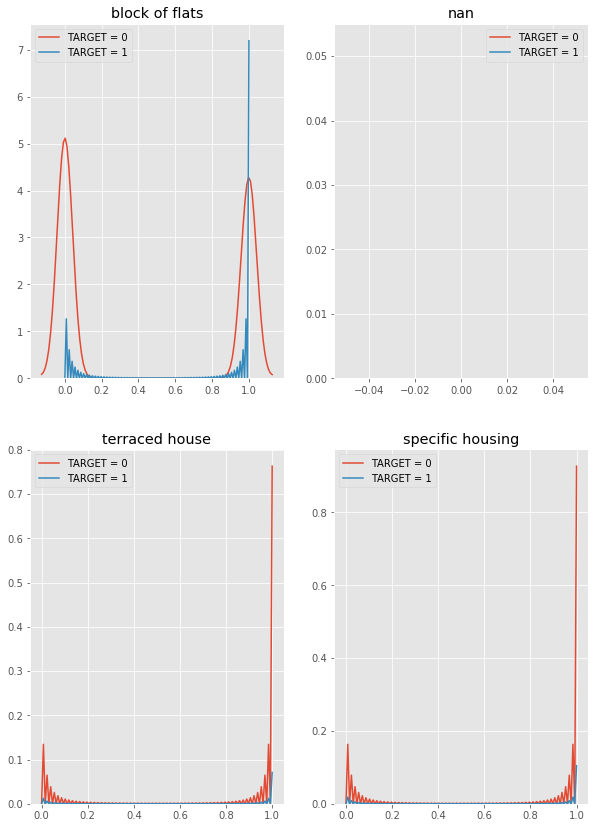

In [16]:


plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot((app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & \
                              (app_train['TARGET'] == 0) , 'AMT_CREDIT', 
                 label = "TARGET = 0", hist = False)
    sns.distplot((app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & \
                              (app_train['TARGET'] == 1) , 'AMT_CREDIT', 
                 label = "TARGET = 1", hist = False)
    plt.title(str(unique_house_type[i]))
plt.show()  